# Part 2

This notebook includes a comparison of the performance of the selected models. It presents a table and a bar chart to visualize and compare the training and testing scores of these models using both BOW and TF-IDF representations.
We use these techniques and models to explore text classification, and the choice of representation and model depends on the specific goals and characteristics of the dataset. The comparison of the models provides insight into their relative performance for the task of classifying stress-related messages.

### Pre-processing

In [73]:

#Data Loading and Exploration

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
df = pd.read_csv("Stress.csv")

not_used_cols = ['subreddit','post_id','sentence_range','confidence','social_timestamp']
df1 = df.drop(not_used_cols,axis=1)
df1['label'].unique()
#Text processing
#importing required libraries (nltk,spacy,urllib,re etc.)
#downloading required database (omw), wordnet, punkt, stopwords
#cleaning data (with regualr expression)
import nltk
import re
from urllib.parse import urlparse
from spacy import load
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('omw-1.4') # Open Multilingual Wordnet, this is an lexical database 
nltk.download('wordnet') 
nltk.download('wordnet2022')
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\nicol\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\nicol\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet2022 to
[nltk_data]     C:\Users\nicol\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet2022 is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nicol\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nicol\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [74]:
lemmatizer = WordNetLemmatizer()
stop_words = list(stopwords.words('english'))
def textProcess(sent):
    try:
        # Replace square brackets, parentheses with spaces
        sent = re.sub('[][)(]', ' ', sent)

        # Remove URLs by checking if a word has a URL scheme
        sent = [word for word in sent.split() if not urlparse(word).scheme]
        sent = ' '.join(sent)

        # Remove escape characters starting with '@'
        sent = re.sub(r'\@\w+', '', sent)

        # Remove HTML tags using regular expressions
        sent = re.sub(re.compile("<.*?>"), '', sent)

        # Keep only letters and numbers, replace others with spaces
        sent = re.sub("[^A-Za-z0-9]", ' ', sent)

        # Convert all words to lowercase
        sent = sent.lower()

        # Strip extra spaces from words and sentences
        sent = [word.strip() for word in sent.split()]
        sent = ' '.join(sent)

        # Tokenize the text into words
        tokens = word_tokenize(sent)
        
        # Remove stopwords (common words that don't carry much meaning)
        tokens = [word for word in tokens if word not in stop_words]

        # Lemmatize the words (convert words to their base form)
        sent = [lemmatizer.lemmatize(word) for word in tokens]
        sent = ' '.join(sent)

        return sent

    except Exception as ex:
        # Handle exceptions and print an error message
        print(sent, "\n")
        print("Error ", ex)


In [75]:
df1['processed_text'] = df1['text'].apply(lambda text: textProcess(text))

## BOW (Bag Of Word) / TF-IDF


### Bag of Words (BOW):

BOW is a straightforward and effective method for text classification with a quickly understand of the word frequency distribution in documents, which is essential for our classification task. BOW identifying important keywords in documents, aiding our content comprehension by highlighting key terms.

In [49]:
lemmatizer = WordNetLemmatizer()
stop_words = list(stopwords.words('english'))
def textProcess(sent):
    try:
        # Replace square brackets, parentheses with spaces
        sent = re.sub('[][)(]', ' ', sent)

        # Remove URLs by checking if a word has a URL scheme
        sent = [word for word in sent.split() if not urlparse(word).scheme]
        sent = ' '.join(sent)

        # Remove escape characters starting with '@'
        sent = re.sub(r'\@\w+', '', sent)

        # Remove HTML tags using regular expressions
        sent = re.sub(re.compile("<.*?>"), '', sent)

        # Keep only letters and numbers, replace others with spaces
        sent = re.sub("[^A-Za-z0-9]", ' ', sent)

        # Convert all words to lowercase
        sent = sent.lower()

        # Strip extra spaces from words and sentences
        sent = [word.strip() for word in sent.split()]
        sent = ' '.join(sent)

        # Tokenize the text into words
        tokens = word_tokenize(sent)
        
        # Remove stopwords (common words that don't carry much meaning)
        tokens = [word for word in tokens if word not in stop_words]

        # Lemmatize the words (convert words to their base form)
        sent = [lemmatizer.lemmatize(word) for word in tokens]
        sent = ' '.join(sent)

        return sent

    except Exception as ex:
        # Handle exceptions and print an error message
        print(sent, "\n")
        print("Error ", ex)


In [50]:
df1['processed_text'] = df1['text'].apply(lambda text: textProcess(text))

# Part 2

Bag of Words (BOW):

BOW is a straightforward and effective method for text classification with a quickly understand of the word frequency distribution in documents, which is essential for our classification task. BOW identifying important keywords in documents, aiding our content comprehension by highlighting key terms.

In [51]:
from sklearn.feature_extraction.text import CountVectorizer
MIN_DF = 1 
# min_df is used for removing terms that appear too infrequently. 
# For example: min_df = 0.01 means "ignore terms that appear in less than 1% of the documents". 
cv = CountVectorizer(min_df=MIN_DF)
cv_df = cv.fit_transform(df1['processed_text'])
cv_df.toarray()

cv_df = pd.DataFrame(cv_df.toarray(),columns=cv.get_feature_names_out())
cv_df.head(3)  

,00,000,02,06,10,100,1000,100kg,100mg,100x,...,zines,zinsser,zip,zofran,zoloft,zombie,zone,zoo,zuko,zumba
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Term Frequency-Inverse Document Frequency (TF-IDF):


TF-IDF addresses this by giving higher scores to words that are frequent in a specific document but rare across the entire corpus. 
That helps emphasize discriminative terms for classification and reduces the impact of common words like "the" and "and."

TF-IDF (Term frequency - inverse document frequency)

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(min_df=MIN_DF)
tf_df = tf.fit_transform(df1['processed_text'])
tf_df.toarray()


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [53]:
tf_df = pd.DataFrame(tf_df.toarray(),columns=tf.get_feature_names_out())
tf_df.head(3)

,00,000,02,06,10,100,1000,100kg,100mg,100x,...,zines,zinsser,zip,zofran,zoloft,zombie,zone,zoo,zuko,zumba
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [54]:
tf_df.describe()

,00,000,02,06,10,100,1000,100kg,100mg,100x,...,zines,zinsser,zip,zofran,zoloft,zombie,zone,zoo,zuko,zumba
count,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,...,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000
mean,0.000176,0.000570,0.000112,0.000074,0.003420,0.001897,0.000607,0.000106,0.000122,0.000071,...,0.000080,0.000074,0.000212,0.000081,0.000748,0.000136,0.000257,0.000094,0.000058,0.000040
std,0.006641,0.010400,0.005943,0.003941,0.022159,0.018407,0.011747,0.005624,0.004854,0.003765,...,0.004252,0.003921,0.008125,0.004293,0.012308,0.005144,0.007226,0.004999,0.003113,0.002135
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.265556,0.337824,0.316593,0.209957,0.277953,0.298782,0.324070,0.299611,0.231738,0.200569,...,0.226519,0.208890,0.357795,0.228713,0.314832,0.201190,0.286642,0.266303,0.165859,0.113743


In [55]:
cv_df.shape,tf_df.shape

((2838, 10140), (2838, 10140))

### Choose the best model

Each case explores a different combination of model and feature representation.

The choice between models and representations may depend on the specific characteristics of our data and the trade-off between simplicity and complexity in the model.

BOW treats all words equally, including common ones that may not be informative for classification.


In [56]:
# Import necessary libraries and modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(cv_df, df1['label'], stratify=df1['label'])


 Logistic Regression is chosen for its simplicity and interpretability. Bag of Words (BOW) representation is used, which creates a vocabulary of words and encodes each document as a vector of word counts.

In [57]:
# Initialize the models and train them
# Logistic Regression with BOW
model_lr_bow = LogisticRegression()
model_lr_bow.fit(X_train, y_train)


LogisticRegression()

In [58]:
# Evaluate the models on the test set
# Logistic Regression with BOW
lr_bow_train_score = model_lr_bow.score(X_train, y_train)
lr_bow_test_score = model_lr_bow.score(X_test, y_test)

print(lr_bow_train_score)
print(lr_bow_test_score)

0.9967105263157895
0.7253521126760564


Naive Bayes is selected for its effectiveness in handling text data. It's also based on the BOW representation, Naive Bayes makes strong independence assumptions between features, which can work well with BOW. It's computationally efficient and often used in text classification tasks.

In [64]:
# Naive Bayes with BOW
model_nb_bow = MultinomialNB()
model_nb_bow.fit(X_train, y_train)
# Scores
nb_bow_train_score = model_nb_bow.score(X_train, y_train)
nb_bow_test_score = model_nb_bow.score(X_test, y_test)


Random Forest is a more complex model capable of capturing non-linear relationships in the data. It uses BOW features.
Reason: Random Forest can capture intricate patterns in text data and provide better generalization by aggregating multiple decision trees.

In [65]:
# Random Forest with BOW
model_rf_bow = RandomForestClassifier()
model_rf_bow.fit(X_train, y_train)

RandomForestClassifier()

In [66]:

# Random Forest with BOW
rf_bow_train_score = model_rf_bow.score(X_train, y_train)
rf_bow_test_score = model_rf_bow.score(X_test, y_test)


TF-IDF


Term Frequency-Inverse Document Frequency (TF-IDF):

BOW treats all words equally, including common ones that may not be informative for classification.
TF-IDF addresses this by giving higher scores to words that are frequent in a specific document but rare across the entire corpus. 
That helps emphasize discriminative terms for classification and reduces the impact of common words like "the" and "and."

In [67]:

# Repeat the same steps for TF-IDF
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(tf_df, df1['label'], stratify=df1['label'])


Logistic Regression with the Term Frequency-Inverse Document Frequency (TF-IDF) representation. 
TF-IDF assigns weights to words based on their importance that can highlight the significance of words in documents, and Logistic Regression can efficiently handle these weighted features.

In [68]:
# Logistic Regression with TF-IDF
model_lr_tfidf = LogisticRegression()
model_lr_tfidf.fit(X_train_tfidf, y_train_tfidf)
# Evaluate the models on the test set
# Logistic Regression with TF-IDF
lr_tfidf_train_score = model_lr_tfidf.score(X_train_tfidf, y_train_tfidf)
lr_tfidf_test_score = model_lr_tfidf.score(X_test_tfidf, y_test_tfidf)


Naive Bayes with TF-IDF is a robust choice when considering term importance. 
Very useful when certain words are more informative.

In [69]:
# Naive Bayes with TF-IDF
model_nb_tfidf = MultinomialNB()
model_nb_tfidf.fit(X_train_tfidf, y_train_tfidf)

# Naive Bayes with TF-IDF
nb_tfidf_train_score = model_nb_tfidf.score(X_train_tfidf, y_train_tfidf)
nb_tfidf_test_score = model_nb_tfidf.score(X_test_tfidf, y_test_tfidf)


Random Forest is used with TF-IDF features for its ability to handle high-dimensional data and can effectively exploit the weighted word features provided by TF-IDF.

In [70]:
# Random Forest with TF-IDF
model_rf_tfidf = RandomForestClassifier()
model_rf_tfidf.fit(X_train_tfidf, y_train_tfidf)
# Random Forest with TF-IDF
rf_tfidf_train_score = model_rf_tfidf.score(X_train_tfidf, y_train_tfidf)
rf_tfidf_test_score = model_rf_tfidf.score(X_test_tfidf, y_test_tfidf)

Comparaison between all model choosen

In [71]:
import pandas as pd

# Create a dictionary with the model names and their respective scores
scores_data = {
    'Model': ['Logistic Regression with BOW', 'Naive Bayes with BOW', 'Random Forest with BOW',
              'Logistic Regression with TF-IDF', 'Naive Bayes with TF-IDF', 'Random Forest with TF-IDF'],
    'Train Score (BOW)': [lr_bow_train_score, nb_bow_train_score, rf_bow_train_score, 0, 0, 0],
    'Test Score (BOW)': [lr_bow_test_score, nb_bow_test_score, rf_bow_test_score, 0, 0, 0],
    'Train Score (TF-IDF)': [0, 0, 0, lr_tfidf_train_score, nb_tfidf_train_score, rf_tfidf_train_score],
    'Test Score (TF-IDF)': [0, 0, 0, lr_tfidf_test_score, nb_tfidf_test_score, rf_tfidf_test_score]
}

# Create a Pandas DataFrame
scores_df = pd.DataFrame(scores_data)

# Display the comparison table
print(scores_df)


                             Model  Train Score (BOW)  Test Score (BOW)  \
0     Logistic Regression with BOW           0.996711          0.725352   
1             Naive Bayes with BOW           0.934680          0.715493   
2           Random Forest with BOW           0.998590          0.721127   
3  Logistic Regression with TF-IDF           0.000000          0.000000   
4          Naive Bayes with TF-IDF           0.000000          0.000000   
5        Random Forest with TF-IDF           0.000000          0.000000   

   Train Score (TF-IDF)  Test Score (TF-IDF)  
0              0.000000             0.000000  
1              0.000000             0.000000  
2              0.000000             0.000000  
3              0.915414             0.738028  
4              0.866071             0.695775  
5              0.999530             0.715493  


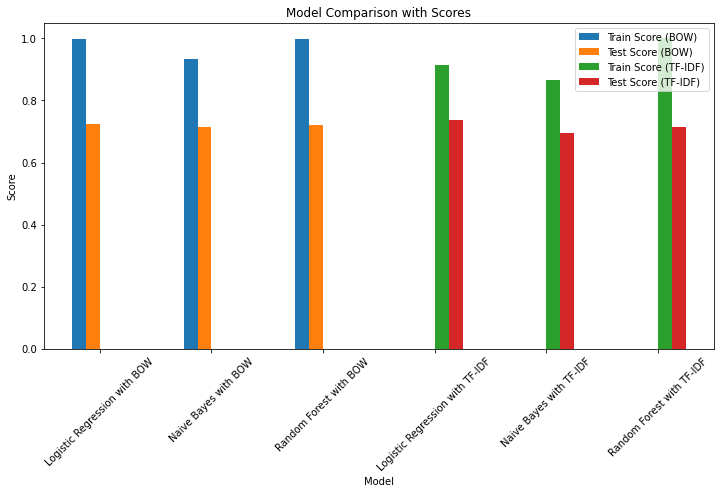

In [72]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a dictionary with the model names and their respective scores
scores_data = {
    'Model': ['Logistic Regression with BOW', 'Naive Bayes with BOW', 'Random Forest with BOW',
              'Logistic Regression with TF-IDF', 'Naive Bayes with TF-IDF', 'Random Forest with TF-IDF'],
    'Train Score (BOW)': [lr_bow_train_score, nb_bow_train_score, rf_bow_train_score, 0, 0, 0],
    'Test Score (BOW)': [lr_bow_test_score, nb_bow_test_score, rf_bow_test_score, 0, 0, 0],
    'Train Score (TF-IDF)': [0, 0, 0, lr_tfidf_train_score, nb_tfidf_train_score, rf_tfidf_train_score],
    'Test Score (TF-IDF)': [0, 0, 0, lr_tfidf_test_score, nb_tfidf_test_score, rf_tfidf_test_score]
}

# Create a Pandas DataFrame
scores_df = pd.DataFrame(scores_data)

# Set the 'Model' column as the index
scores_df.set_index('Model', inplace=True)

# Plot a bar chart for comparison
ax = scores_df.plot(kind='bar', figsize=(12, 6), rot=45)  # Rotate x-axis labels by 45 degrees
ax.set_ylabel('Score')
ax.set_title('Model Comparison with Scores')

# Show the table and chart
plt.show()


Random Forest seems to be the best model to choose to continue our studies.